In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## roc curve and auc score 

from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split

X, y = make_classification (n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [5]:
X.shape

(2000, 20)

In [6]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Random Forests application

In [10]:
### Apply RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rf_model  = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF train roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))



RF train roc-auc: 1.0
RF train roc-auc: 0.9832444444444446


In [11]:
ytrain_pred

array([[0.99, 0.01],
       [0.99, 0.01],
       [0.02, 0.98],
       ...,
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.27, 0.73]])

Logistic Regression

In [12]:

from sklearn.linear_model import LogisticRegression
log_classifier  = LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))


Logistic train roc-auc: 0.9863568922694498
Logistic train roc-auc: 0.9885777777777777


In [14]:
### Adaboost

from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('knn train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('knn test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

knn train roc-auc: 0.981670071491109
knn test roc-auc: 0.9426111111111111


Now we will focus on selecting the best threshold for maximum accuracy

In [17]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9852777777777778


In [18]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.66,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,0.98,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [19]:
final_prediction

0      0.885262
1      0.118323
2      0.821283
3      0.747853
4      0.582447
         ...   
595    0.123840
596    0.117845
597    0.874197
598    0.165717
599    0.834857
Length: 600, dtype: float64

In [20]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.9059413 , 0.90577475, 0.80264532,
       0.80162833, 0.79627646, 0.7955558 , 0.78380736, 0.78071156,
       0.75570853, 0.75537124, 0.73321832, 0.73137362, 0.71347576,
       0.70893711, 0.67288086, 0.66993537, 0.61744697, 0.61114346,
       0.61029968, 0.60925354, 0.59462652, 0.58800386, 0.57042732,
       0.56736186, 0.56355932, 0.55969563, 0.55338469, 0.53377948,
       0.52615858, 0.49616892, 0.45419266, 0.43014281, 0.4271034 ,
       0.38568654, 0.37629719, 0.35183098, 0.35086612, 0.22948424,
       0.22640421, 0.22392702, 0.22146893, 0.20282943, 0.19848417,
       0.12583353, 0.1253351 , 0.10548439])

In [21]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
33,0.430143,0.960000
32,0.454193,0.960000
34,0.427103,0.958333
31,0.496169,0.958333
29,0.533779,0.958333


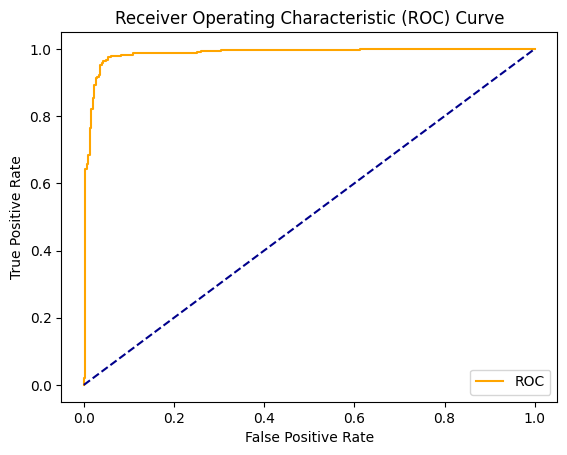

In [24]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)